#**Zbiór danych**

## Krótka charakterystyka zbioru
Zbiór danych *Student_Performance.csv* zawiera informacje o 10 000 uczniach. Każdy rekord zawiera dane o różnych czynnikach oraz wskaźniku wydajności, który reprezentuje ogólne wyniki ucznia.

## Temat projektu i cel analizy badawczej
Tematem projektu jest **Analiza czynników wpływających na wyniki uczniów**

Celem analizy badawczej jest stworzenie modelu, który pozwoli przewidzieć wskaźnik wydajności ucznia na podstawie różnych czynników.

## Zmienna objaśniana (zależna):
Performance Index (zmienna ilościowa): Miara ogólnych wyników każdego ucznia

## Zmienne objaśniające:
- Hours Studied (zmienna ilościowa): Całkowita liczba godzin spędzonych na nauce przez każdego studenta
- Previous Scores (zmienna ilościowa): Wyniki uzyskane przez uczniów w poprzednich testach
- Extracurricular Activities (zmienna jakościowa): Czy uczeń uczestniczy w zajęciach pozalekcyjnych (Tak/Nie)
- Sleep Hours (zmienna ilościowa): Średnia liczba godzin snu ucznia w ciągu dnia
- Sample Question Papers Practiced (zmienna ilościowa): Liczba przykładowych arkuszy pytań przećwiczonych przez ucznia



In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('Student_Performance.csv')
data.head(4)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0


#Statystyczny opis struktury analizowanych cech



##Statystyki opisowe dla zmiennej objaśnianej - Performance Index

In [ ]:
statystyki_zmiennej_objasnianej = data['Performance Index'].describe()

print(statystyki_zmiennej_objasnianej)

count    10000.000000
mean        55.224800
std         19.212558
min         10.000000
25%         40.000000
50%         55.000000
75%         71.000000
max        100.000000
Name: Performance Index, dtype: float64


- count - 10 000 uczniów, dla których dostępne są dane o wynikach
- mean - średnia arytmetyczna wyników uzyskanych przez uczniów
- std - odchylenie standardowe wynosi około 19.21, co wskazuje na przeciętne zróżnicowanie wyników uczniów wokół średniej
- min - najniższy uzyskany wynik to 10
- 25% - pierwszy kwartyl wynosi 40, co oznacza, że 25% uczniów otrzymało wyniki mniejsze lub równe 40
- 50% - mediana wynosi 55, co oznacza, że 50% uczniów ma wskaźnik wydajności mniejszy lub równy 55, a pozostałe 50% ma wskaźnik wydajności większy lub równy 55
- 75% - trzeci kwartyl wynosi 71, co oznacza, że 75% uczniów otrzymało wyniki mniejsze lub równe 71
- max - najwyższy uzyskany wynik to 100


Z otrzymanych wyników możemy dojśc do następujących wniosków:
- średnia arytmetyczna jest nieco powyżej mediany, co sugeruje, że rozkład może być prawostronnie skośny
- wartość odchylenia standardowego informuje o przeciętnym rozproszeniu wyników
- wyniki uczniów mieszczą się w przedziale <10, 100>

##Wykresy dla zmiennej objaśnianej - Performance Index

In [ ]:
#wczytanie biblioteki potrzebnych do stworzenia wykresów w Python
import matplotlib.pyplot as plt
import seaborn as sns

### Wykres ramka wąsy dla mediany



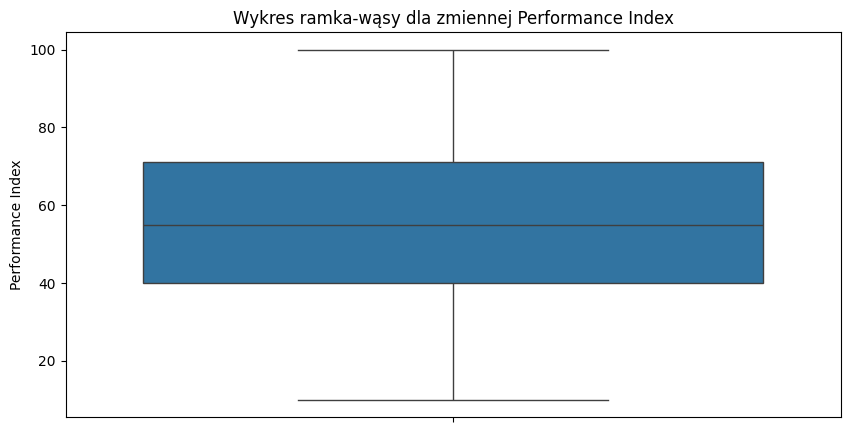

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(y=data['Performance Index'])
plt.title('Wykres ramka-wąsy dla zmiennej Performance Index')
plt.ylabel('Performance Index')

plt.show()



Z wykresu odczytujemy następujące własności:
- max wynik jest równy 100
- min wynik wynosi około 10
- pierwszy kwartyl - 25% jest równy 40
- trzeci kwartyl - 75% wynosi około 70
- pomiędzy pierwszym a trzecim kwartylem jest mediana - 50%. Wynosi ona 55%.

Kształt wykresu na pierwszy rzut wydaje się symetryczny względem kreski z medianą, jednak jest delikatna asymetria prawostronna.

### Histogram

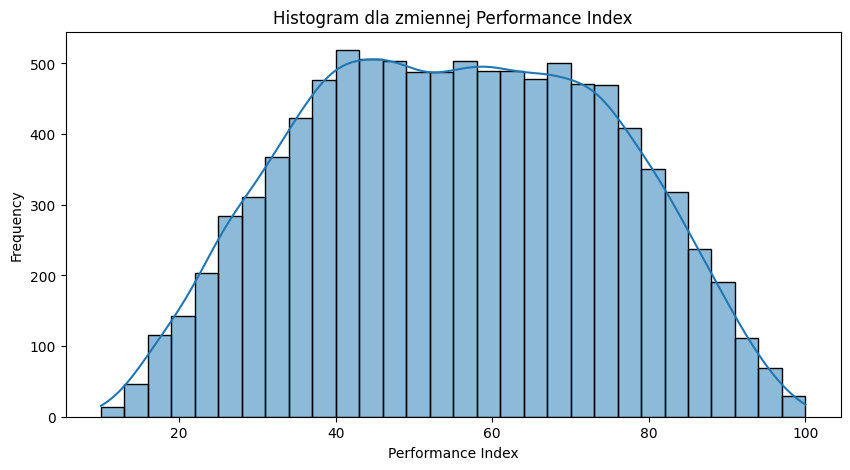

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Performance Index'], bins=30, kde=True)
plt.title('Histogram dla zmiennej Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')
plt.show()

Histogram przedstawia liczbę uczniów, którzy uzyskali taki sam wynik. Oś pozioma (x) reprezentuje wartości wyników uzyskanych, natomiast oś pionowa (y) pokazuje liczbę uczniów, którzy osiągnęli daną wartość.

Dzięki analizie tego wykresu możemy dojść do następujących wniosków:
- Najczęściej występujące wyniki zawierają się w przedziale od 40 do 70.
- Jest to histogram zmiennej prawostronnie skośnej - skośność jest dodatnia.



##Skategoryzowany wykres ramka – wąsy oraz skategoryzowany histogram i/lub inne wykresy adekwatne do postawionego problemu badawczego

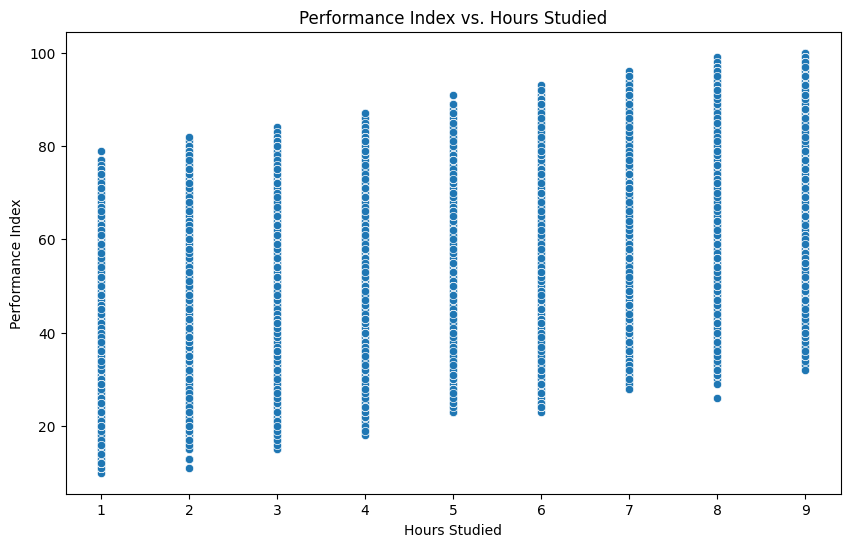

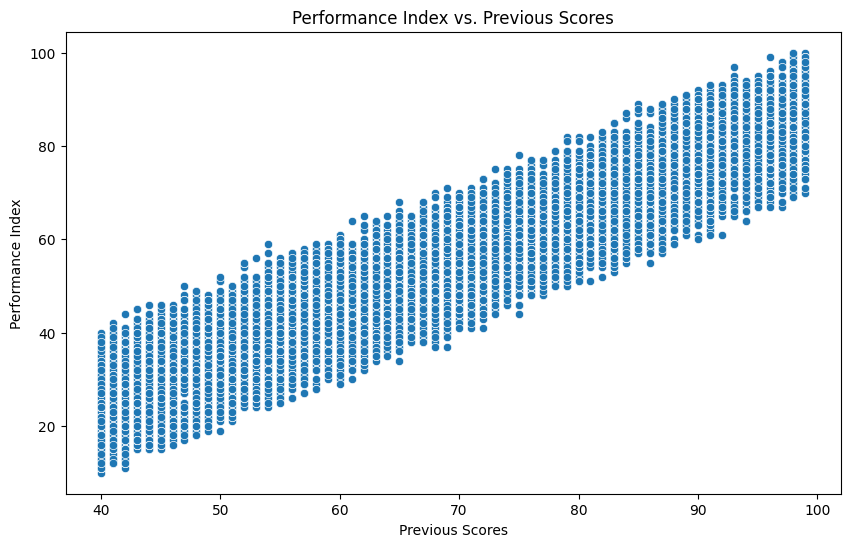

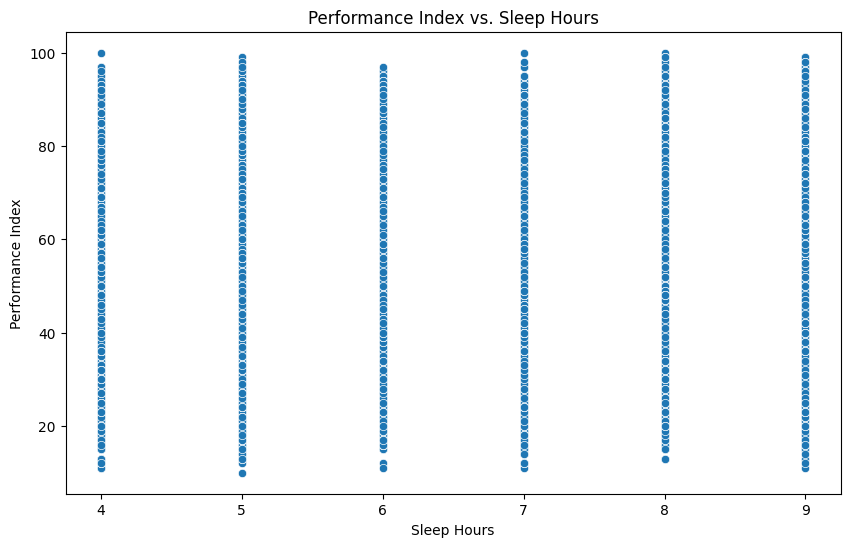

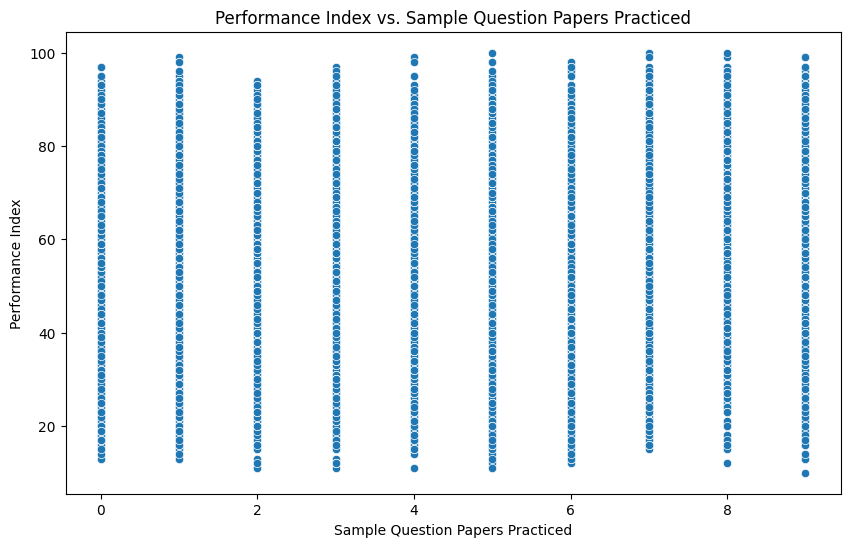

In [ ]:
# Scatter plot dla "Hours Studied" vs. "Performance Index"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours Studied', y='Performance Index', data=data)
plt.title('Performance Index vs. Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.show()

# Scatter plot dla "Previous Scores" vs. "Performance Index"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Previous Scores', y='Performance Index', data=data)
plt.title('Performance Index vs. Previous Scores')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.show()

# Scatter plot dla "Sleep Hours" vs. "Performance Index"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep Hours', y='Performance Index', data=data)
plt.title('Performance Index vs. Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.show()

# Scatter plot dla "Sample Question Papers Practiced" vs. "Performance Index"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sample Question Papers Practiced', y='Performance Index', data=data)
plt.title('Performance Index vs. Sample Question Papers Practiced')
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.show()

#Analiza statystyczna i modelowanie regresji



In [ ]:
data.shape

(10000, 6)

In [ ]:
data.isna().sum().sum()

0

In [ ]:
data.isna().sum(axis=1).sum()

0

In [ ]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = data.drop(columns=['Previous Scores', 'Extracurricular Activities'])
y = data['Previous Scores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_var = X_train[['Sleep Hours']]
X_test_var = X_test[['Sleep Hours']]

In [ ]:
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)





In [ ]:
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)


In [ ]:
print(r2_train)

0.9863937754947946


In [ ]:
print(r2_test)

0.9869630222413436


In [ ]:
print(mae_train)

1.605831095862943


In [ ]:
print(mae_test)

1.5791870382829845


In [ ]:
print(mse_train)

4.090669322601001


In [ ]:
print(mse_test)

3.921722634854567


In [ ]:
print(rmse_train)

2.022540314209089


In [ ]:
print(rmse_test)

1.9803339705349112
